# Adilabad Heatwave Prediction: 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam,SGD
from sklearn.preprocessing import StandardScaler

2023-03-03 22:54:47.801448: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-03 22:54:48.648590: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-03-03 22:54:48.648644: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-03-03 22:54:48.648651: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

## Loading Datasets and Preprocessing: 

In [2]:
db19 = pd.read_csv("./Datasets/2019")
db20 = pd.read_csv("./Datasets/2020")
db21 = pd.read_csv("./Datasets/2021.csv")
db22 = pd.read_csv("./Datasets/2022.csv")
db_soil = pd.read_csv("./Datasets/soil.csv")

In [3]:
db19.head()

,Unnamed: 0,District,Mandal,Date,Rainfall (mm),temp_min (⁰C),temp_max (⁰C),humidity_min (%),humidity_max (%),wind_speed_min (Kmph),wind_speed_max (Kmph)
0,0,Adilabad,Adilabad (Urban),2019-01-01,0.0,5.4,26.8,20.9,91.7,0.0,1.2
1,1,Adilabad,Adilabad (Urban),2019-01-02,0.0,6.6,28.8,20.9,92.4,0.0,2.2
2,2,Adilabad,Adilabad (Urban),2019-01-03,0.0,9.5,31.3,20.3,86.3,0.0,1.2
3,3,Adilabad,Adilabad (Urban),2019-01-04,0.0,9.3,30.8,24.5,95.2,0.0,1.4
4,4,Adilabad,Adilabad (Urban),2019-01-05,0.0,10.3,30.8,22.6,94.6,0.0,1.2


In [4]:
db20.head()

,Unnamed: 0,District,Mandal,Date,Rainfall (mm),temp_min (⁰C),temp_max (⁰C),humidity_min (%),humidity_max (%),wind_speed_max (Kmph),wind_speed_min (Kmph)
0,0,Adilabad,Bheempoor,2020-01-01,6.8,16.4,25.8,62.2,96.2,3.2,0.0
1,1,Adilabad,Bheempoor,2020-01-02,0.0,17.1,27.7,65.4,94.8,2.1,0.0
2,2,Adilabad,Bheempoor,2020-01-03,25.8,16.9,22.2,85.6,96.9,1.1,0.0
3,3,Adilabad,Bheempoor,2020-01-04,0.0,15.1,23.0,79.5,98.3,1.4,0.0
4,4,Adilabad,Bheempoor,2020-01-05,0.0,13.2,25.7,63.5,98.2,0.7,0.0


In [5]:
db21.head()

,Unnamed: 0,District,Mandal,Date,Rainfall (mm),temp_min (⁰C),temp_max (⁰C),humidity_min (%),humidity_max (%),wind_speed_max (Kmph),wind_speed_min (Kmph)
0,0,Adilabad,Bheempoor,2021-01-01 00:00:00,0.0,10.1,30.0,37.8,95.7,3.1,0.0
1,1,Adilabad,Bheempoor,2021-01-02 00:00:00,0.0,11.7,29.9,40.6,96.6,2.2,0.0
2,2,Adilabad,Bheempoor,2021-01-03 00:00:00,0.0,10.4,30.4,45.8,97.0,2.2,0.0
3,3,Adilabad,Bheempoor,2021-01-04 00:00:00,0.0,13.1,30.5,38.4,96.4,2.0,0.0
4,4,Adilabad,Bheempoor,2021-01-05 00:00:00,0.0,13.4,29.8,50.7,97.0,2.0,0.0


In [6]:
db21_1 = db21.iloc[:53010]
db21_2 = db21.iloc[53010:]

db21_1.Date = pd.to_datetime(db21_1.Date,format="%Y-%m-%d")
db21_2.Date = pd.to_datetime(db21_2.Date,format="%d-%b-%y")
db21 = pd.concat((db21_1,db21_2))
db21

/tmp/ipykernel_13768/56031398.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db21_1.Date = pd.to_datetime(db21_1.Date,format="%Y-%m-%d")
/tmp/ipykernel_13768/56031398.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db21_2.Date = pd.to_datetime(db21_2.Date,format="%d-%b-%y")


,Unnamed: 0,District,Mandal,Date,Rainfall (mm),temp_min (⁰C),temp_max (⁰C),humidity_min (%),humidity_max (%),wind_speed_max (Kmph),wind_speed_min (Kmph)
0,0,Adilabad,Bheempoor,2021-01-01,0.0,10.1,30.0,37.8,95.7,3.1,0.0
1,1,Adilabad,Bheempoor,2021-01-02,0.0,11.7,29.9,40.6,96.6,2.2,0.0
2,2,Adilabad,Bheempoor,2021-01-03,0.0,10.4,30.4,45.8,97.0,2.2,0.0
3,3,Adilabad,Bheempoor,2021-01-04,0.0,13.1,30.5,38.4,96.4,2.0,0.0
4,4,Adilabad,Bheempoor,2021-01-05,0.0,13.4,29.8,50.7,97.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
225522,225522,Yadadri Bhuvanagiri,Yadagirigutta,2021-12-27,0.0,18.5,31.0,45.1,93.5,4.0,0.0
225523,225523,Yadadri Bhuvanagiri,Yadagirigutta,2021-12-28,0.0,17.1,29.0,46.5,91.8,5.6,0.0
225524,225524,Yadadri Bhuvanagiri,Yadagirigutta,2021-12-29,0.0,16.5,29.8,45.2,92.3,8.1,0.0
225525,225525,Yadadri Bhuvanagiri,Yadagirigutta,2021-12-30,0.0,17.5,30.0,43.9,90.8,8.2,0.0


In [7]:
db22.head()

,District,Mandal,Date,Rainfall (mm),temp_min (⁰C),temp_max (⁰C),humidity_min (%),humidity_max (%),wind_speed_max (Kmph),wind_speed_min (Kmph)
0,Adilabad,Adilabad Rural,01-Jan-22,0.0,14.1,23.8,72.6,99.5,0.0,7.1
1,Adilabad,Adilabad Rural,02-Jan-22,0.0,13.5,27.4,55.6,99.8,0.0,8.0
2,Adilabad,Adilabad Rural,03-Jan-22,0.0,12.9,28.4,44.7,99.0,0.0,7.9
3,Adilabad,Adilabad Rural,04-Jan-22,0.0,12.7,27.6,49.5,99.0,0.0,9.7
4,Adilabad,Adilabad Rural,05-Jan-22,0.0,12.5,28.5,41.9,97.7,0.0,9.5


In [8]:
db22.Date = pd.to_datetime(db22.Date,format="%d-%b-%y")

In [9]:
db22

,District,Mandal,Date,Rainfall (mm),temp_min (⁰C),temp_max (⁰C),humidity_min (%),humidity_max (%),wind_speed_max (Kmph),wind_speed_min (Kmph)
0,Adilabad,Adilabad Rural,2022-01-01,0.0,14.1,23.8,72.6,99.5,0.0,7.1
1,Adilabad,Adilabad Rural,2022-01-02,0.0,13.5,27.4,55.6,99.8,0.0,8.0
2,Adilabad,Adilabad Rural,2022-01-03,0.0,12.9,28.4,44.7,99.0,0.0,7.9
3,Adilabad,Adilabad Rural,2022-01-04,0.0,12.7,27.6,49.5,99.0,0.0,9.7
4,Adilabad,Adilabad Rural,2022-01-05,0.0,12.5,28.5,41.9,97.7,0.0,9.5
...,...,...,...,...,...,...,...,...,...,...
162157,Yadadri Bhuvanagiri,Yadagirigutta,2022-09-26,0.0,23.1,35.6,55.4,99.0,0.0,2.0
162158,Yadadri Bhuvanagiri,Yadagirigutta,2022-09-27,2.9,22.8,37.0,53.7,99.2,0.0,1.2
162159,Yadadri Bhuvanagiri,Yadagirigutta,2022-09-28,0.0,23.8,35.3,74.6,99.0,0.0,8.7
162160,Yadadri Bhuvanagiri,Yadagirigutta,2022-09-29,29.1,21.3,33.8,67.4,99.5,0.0,6.5


In [10]:
db = pd.concat((db19,db20,db21,db22))
# db = pd.concat((db19,db20))
db.drop("Unnamed: 0",axis=1,inplace=True)
db.Date = pd.to_datetime(db.Date,format = "%Y-%m-%d")

In [11]:
db

,District,Mandal,Date,Rainfall (mm),temp_min (⁰C),temp_max (⁰C),humidity_min (%),humidity_max (%),wind_speed_min (Kmph),wind_speed_max (Kmph)
0,Adilabad,Adilabad (Urban),2019-01-01,0.0,5.4,26.8,20.9,91.7,0.0,1.2
1,Adilabad,Adilabad (Urban),2019-01-02,0.0,6.6,28.8,20.9,92.4,0.0,2.2
2,Adilabad,Adilabad (Urban),2019-01-03,0.0,9.5,31.3,20.3,86.3,0.0,1.2
3,Adilabad,Adilabad (Urban),2019-01-04,0.0,9.3,30.8,24.5,95.2,0.0,1.4
4,Adilabad,Adilabad (Urban),2019-01-05,0.0,10.3,30.8,22.6,94.6,0.0,1.2
...,...,...,...,...,...,...,...,...,...,...
162157,Yadadri Bhuvanagiri,Yadagirigutta,2022-09-26,0.0,23.1,35.6,55.4,99.0,2.0,0.0
162158,Yadadri Bhuvanagiri,Yadagirigutta,2022-09-27,2.9,22.8,37.0,53.7,99.2,1.2,0.0
162159,Yadadri Bhuvanagiri,Yadagirigutta,2022-09-28,0.0,23.8,35.3,74.6,99.0,8.7,0.0
162160,Yadadri Bhuvanagiri,Yadagirigutta,2022-09-29,29.1,21.3,33.8,67.4,99.5,6.5,0.0


In [12]:
db.head()

,District,Mandal,Date,Rainfall (mm),temp_min (⁰C),temp_max (⁰C),humidity_min (%),humidity_max (%),wind_speed_min (Kmph),wind_speed_max (Kmph)
0,Adilabad,Adilabad (Urban),2019-01-01,0.0,5.4,26.8,20.9,91.7,0.0,1.2
1,Adilabad,Adilabad (Urban),2019-01-02,0.0,6.6,28.8,20.9,92.4,0.0,2.2
2,Adilabad,Adilabad (Urban),2019-01-03,0.0,9.5,31.3,20.3,86.3,0.0,1.2
3,Adilabad,Adilabad (Urban),2019-01-04,0.0,9.3,30.8,24.5,95.2,0.0,1.4
4,Adilabad,Adilabad (Urban),2019-01-05,0.0,10.3,30.8,22.6,94.6,0.0,1.2


In [13]:
adlb = db[db.District == "Adilabad"]
adlb

,District,Mandal,Date,Rainfall (mm),temp_min (⁰C),temp_max (⁰C),humidity_min (%),humidity_max (%),wind_speed_min (Kmph),wind_speed_max (Kmph)
0,Adilabad,Adilabad (Urban),2019-01-01,0.0,5.4,26.8,20.9,91.7,0.0,1.2
1,Adilabad,Adilabad (Urban),2019-01-02,0.0,6.6,28.8,20.9,92.4,0.0,2.2
2,Adilabad,Adilabad (Urban),2019-01-03,0.0,9.5,31.3,20.3,86.3,0.0,1.2
3,Adilabad,Adilabad (Urban),2019-01-04,0.0,9.3,30.8,24.5,95.2,0.0,1.4
4,Adilabad,Adilabad (Urban),2019-01-05,0.0,10.3,30.8,22.6,94.6,0.0,1.2
...,...,...,...,...,...,...,...,...,...,...
144877,Adilabad,Utnur,2022-09-26,0.0,24.7,33.8,70.9,99.9,8.9,0.0
144878,Adilabad,Utnur,2022-09-27,41.0,25.0,32.6,72.0,99.9,12.5,0.0
144879,Adilabad,Utnur,2022-09-28,0.0,23.9,32.5,77.0,99.9,10.3,0.0
144880,Adilabad,Utnur,2022-09-29,4.1,25.0,32.3,70.9,99.9,11.8,0.0


In [14]:
adlb.Mandal.unique()

array(['Adilabad (Urban)', 'Adilabad Rural', 'Bazarhathnoor', 'Bela',
       'Bela ', 'Bheempoor', 'Boath', 'Boath ', 'Gadiguda', 'Gudihatnoor',
       'Ichoda', 'Inderavelly', 'Jainad', 'Jainad ', 'Mavala', 'Narnoor',
       'Neradigonda', 'Sirikonda', 'Talamadugu', 'Talamadugu ', 'Tamsi',
       'Utnur', 'Gudihathnur', 'Adilabad Urban'], dtype=object)

In [15]:
adlb.Mandal = adlb.Mandal.transform(lambda x : x.strip())

/tmp/ipykernel_13768/391653919.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adlb.Mandal = adlb.Mandal.transform(lambda x : x.strip())


In [16]:
adlb.Mandal.unique()

array(['Adilabad (Urban)', 'Adilabad Rural', 'Bazarhathnoor', 'Bela',
       'Bheempoor', 'Boath', 'Gadiguda', 'Gudihatnoor', 'Ichoda',
       'Inderavelly', 'Jainad', 'Mavala', 'Narnoor', 'Neradigonda',
       'Sirikonda', 'Talamadugu', 'Tamsi', 'Utnur', 'Gudihathnur',
       'Adilabad Urban'], dtype=object)

In [17]:
adlb.Mandal = adlb.Mandal.transform(lambda x : "Gudihathnur" if x=="Gudihathnoor" or x=="Gudihatnoor" else ("Adilabad Urban" if x=="Adilabad (Urban)" else x)) 

/tmp/ipykernel_13768/4041370943.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adlb.Mandal = adlb.Mandal.transform(lambda x : "Gudihathnur" if x=="Gudihathnoor" or x=="Gudihatnoor" else ("Adilabad Urban" if x=="Adilabad (Urban)" else x))


In [18]:
adlb.Mandal.unique()

array(['Adilabad Urban', 'Adilabad Rural', 'Bazarhathnoor', 'Bela',
       'Bheempoor', 'Boath', 'Gadiguda', 'Gudihathnur', 'Ichoda',
       'Inderavelly', 'Jainad', 'Mavala', 'Narnoor', 'Neradigonda',
       'Sirikonda', 'Talamadugu', 'Tamsi', 'Utnur'], dtype=object)

In [19]:
adlb = adlb.groupby("Date").mean().sort_index()
adlb["Date"] = adlb.index
adlb.index = np.arange(len(adlb))
adlb

/tmp/ipykernel_13768/3965124643.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  adlb = adlb.groupby("Date").mean().sort_index()


,Rainfall (mm),temp_min (⁰C),temp_max (⁰C),humidity_min (%),humidity_max (%),wind_speed_min (Kmph),wind_speed_max (Kmph),Date
0,0.000000,7.026087,27.443478,21.004348,75.134783,0.000000,6.359091,2019-01-01
1,0.000000,8.095652,29.543478,20.104348,77.769565,0.009091,6.290909,2019-01-02
2,0.000000,10.243478,31.908696,19.152174,78.378261,0.000000,5.200000,2019-01-03
3,0.000000,10.626087,31.508696,23.830435,84.613043,0.004545,5.659091,2019-01-04
4,0.000000,11.130435,31.373913,25.360870,82.913043,0.004545,4.904545,2019-01-05
...,...,...,...,...,...,...,...,...
1363,0.000000,23.544444,33.972222,66.955556,99.361111,10.594444,0.000000,2022-09-26
1364,11.888889,24.683333,33.350000,73.783333,99.105556,8.488889,0.000000,2022-09-27
1365,1.166667,23.661111,33.894444,72.594444,99.633333,6.211111,0.011111,2022-09-28
1366,9.816667,24.322222,32.605556,76.105556,99.594444,7.116667,0.000000,2022-09-29


/tmp/ipykernel_13768/2562079140.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(adlb.corr(),annot=True)


<AxesSubplot: >

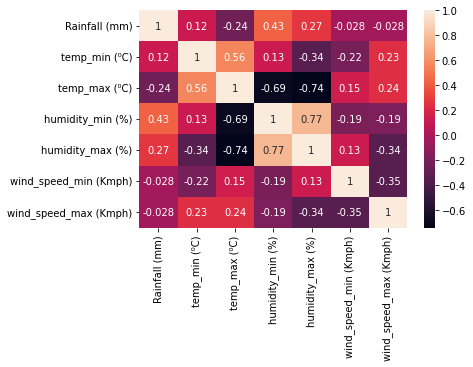

In [20]:
# plt.figure(figsize=(15,15))
sns.heatmap(adlb.corr(),annot=True)

In [21]:
adlb.drop(["wind_speed_min (Kmph)","wind_speed_max (Kmph)"],axis=1,inplace=True)
adlb.fillna(method="ffill",inplace=True)

### Scaling the Data: 

In [22]:
n = StandardScaler()
n1 = StandardScaler()
dates = adlb.Date
cols = adlb.columns
ind = adlb.index

for i in adlb:
    if i!="temp_max (⁰C)" and i!="Date":
        adlb[i] = n.fit_transform(adlb[i].values.reshape(-1,1))
    elif i!="Date":
        n1.fit(adlb[i].values.reshape(-1,1))
        adlb[i]=n1.transform(adlb[i].values.reshape(-1,1))
        
adlb["Day"] = adlb.Date.dt.day
adlb["Month"] = adlb.Date.dt.month
adlb["Year"] = adlb.Date.dt.year
adlb.drop("Date",axis=1,inplace=True)
adlb

,Rainfall (mm),temp_min (⁰C),temp_max (⁰C),humidity_min (%),humidity_max (%),Day,Month,Year
0,-0.346213,-2.761326,-1.405436,-1.087180,-0.405263,1,1,2019
1,-0.346213,-2.559111,-0.937301,-1.126819,-0.260582,2,1,2019
2,-0.346213,-2.153037,-0.410043,-1.168756,-0.227158,3,1,2019
3,-0.346213,-2.080701,-0.499212,-0.962709,0.115206,4,1,2019
4,-0.346213,-1.985347,-0.529258,-0.895303,0.021855,5,1,2019
...,...,...,...,...,...,...,...,...
1363,-0.346213,0.361677,0.049961,0.936676,0.925048,26,9,2022
1364,0.738659,0.576998,-0.088746,1.237396,0.911015,27,9,2022
1365,-0.239754,0.383734,0.032623,1.185033,0.939997,28,9,2022
1366,0.549567,0.508725,-0.254698,1.339675,0.937861,29,9,2022


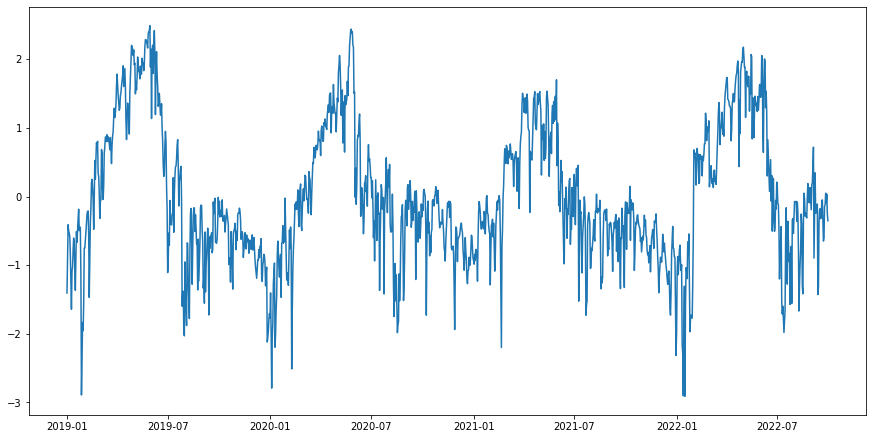

In [23]:
plt.figure(figsize=(15,7.5))
plt.plot(dates,adlb["temp_max (⁰C)"])

## Seasonal Decompose: 

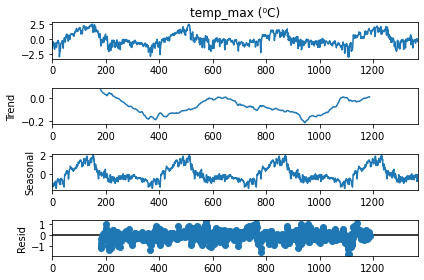

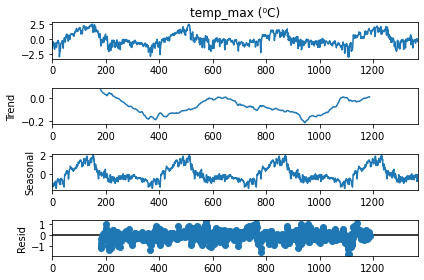

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose

r = seasonal_decompose(adlb["temp_max (⁰C)"],model='additive',period=360)
r.plot()

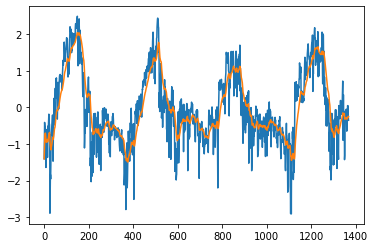

In [25]:
adlb["temp_max (⁰C)"].plot()
adlb["temp_max (⁰C)"].ewm(span=30).mean().plot()

adlb["temp_max (⁰C)"] = adlb["temp_max (⁰C)"].ewm(span=30).mean()

In [26]:
adlb["temp_max (⁰C)"]

0      -1.405436
1      -1.163566
2      -0.895467
3      -0.786284
4      -0.727804
          ...   
1363   -0.274997
1364   -0.262981
1365   -0.243909
1366   -0.244605
1367   -0.251569
Name: temp_max (⁰C), Length: 1368, dtype: float64

## Time Series Forecasting: 

In [27]:
def series_gen(db,label,window=360,lead=360):
    X = db.values
    y = db[label].values

    X_,y_ = [],[]

    for i in range(len(db)-window-lead):
        row = [r for r in X[i:i+window]]
        X_.append(row)
        y_.append(y[i+window:i+window+lead])
        # print(i+window+lead)

    return np.array(X_),np.array(y_)

In [28]:
X,y = series_gen(adlb,"temp_max (⁰C)")

In [29]:
X.shape,y.shape

((648, 360, 8), (648, 360))

In [30]:
y

array([[-1.05401278, -1.11218694, -1.15562165, ..., -0.67177512,
        -0.70487193, -0.74126668],
       [-1.11218694, -1.15562165, -1.19114052, ..., -0.70487193,
        -0.74126668, -0.76292885],
       [-1.15562165, -1.19114052, -1.22852265, ..., -0.74126668,
        -0.76292885, -0.78247436],
       ...,
       [-0.55179693, -0.52208244, -0.50355344, ..., -0.29740763,
        -0.27499674, -0.26298053],
       [-0.52208244, -0.50355344, -0.48422235, ..., -0.27499674,
        -0.26298053, -0.24390935],
       [-0.50355344, -0.48422235, -0.46885503, ..., -0.26298053,
        -0.24390935, -0.2446054 ]])

In [31]:
testx,testy = X[-360:],y[-360:]

lead = 30

trainx,trainy = X[:-360-lead],y[:-360-lead]
valx,valy = X[-360-lead:-360],y[-360-lead:-360]

In [32]:
trainx.shape

(258, 360, 8)

### LSTM Model 

In [37]:
model = Sequential()
model.add(InputLayer((X.shape[1],X.shape[2])))
model.add(LSTM(128))
model.add(Dense(64,activation="relu"))
model.add(Dense(128,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(y.shape[1]))

model.compile(loss=MeanSquaredError(),metrics=RootMeanSquaredError(),optimizer=Adam(learning_rate=0.0001))

model.summary()

model.fit(trainx,trainy,validation_data=(valx,valy),epochs=500)

Model: "sequential"


2023-03-03 15:53:46.590995: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-03 15:53:46.607143: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-03 15:53:46.607322: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-03 15:53:46.607753: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorF

_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               70144     
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 360)               23400     
                                                                 
Total params: 118,376
Trainable params: 118,376
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500


2023-03-03 15:53:49.695791: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8800
2023-03-03 15:53:50.303704: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-03-03 15:53:50.305485: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7f814a38ab30 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-03-03 15:53:50.305501: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2023-03-03 15:53:50.308515: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-03-03 15:53:50.393255: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the l

9/9 [==============================] - 4s 48ms/step - loss: 0.4672 - root_mean_squared_error: 0.6835 - val_loss: 0.3847 - val_root_mean_squared_error: 0.6203
Epoch 2/500
9/9 [==============================] - 0s 15ms/step - loss: 0.4592 - root_mean_squared_error: 0.6776 - val_loss: 0.3841 - val_root_mean_squared_error: 0.6198
Epoch 3/500
9/9 [==============================] - 0s 15ms/step - loss: 0.4535 - root_mean_squared_error: 0.6734 - val_loss: 0.3850 - val_root_mean_squared_error: 0.6205
Epoch 4/500
9/9 [==============================] - 0s 13ms/step - loss: 0.4493 - root_mean_squared_error: 0.6703 - val_loss: 0.3866 - val_root_mean_squared_error: 0.6217
Epoch 5/500
9/9 [==============================] - 0s 13ms/step - loss: 0.4464 - root_mean_squared_error: 0.6681 - val_loss: 0.3874 - val_root_mean_squared_error: 0.6224
Epoch 6/500
9/9 [==============================] - 0s 13ms/step - loss: 0.4441 - root_mean_squared_error: 0.6664 - val_loss: 0.3908 - val_root_mean_squared_error:

In [33]:
model = tf.keras.models.load_model("./Models/Adilabad")

2023-03-03 22:54:53.520013: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-03 22:54:53.537911: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-03 22:54:53.538159: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-03 22:54:53.538598: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorF

In [34]:
pred = model.predict(testx)

2023-03-03 22:54:56.549016: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8800


12/12 [==============================] - 2s 8ms/step


2023-03-03 22:54:57.244590: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


In [35]:
testy[0],pred[0]

(array([-0.34412499, -0.35609334, -0.35746183, -0.39014278, -0.40169905,
        -0.42840988, -0.4344611 , -0.43732541, -0.41307858, -0.38935736,
        -0.37100175, -0.35590778, -0.33227949, -0.30929671, -0.28004637,
        -0.25595906, -0.24581029, -0.23351977, -0.21251408, -0.20684611,
        -0.21352884, -0.22912875, -0.2383689 , -0.24765211, -0.25761481,
        -0.26597595, -0.26109354, -0.26891064, -0.28373403, -0.3132615 ,
        -0.34471918, -0.38309615, -0.40125935, -0.40602601, -0.39634282,
        -0.37737673, -0.35851566, -0.34558554, -0.32757702, -0.32615106,
        -0.30987577, -0.2972073 , -0.32618513, -0.35513112, -0.38021213,
        -0.4022368 , -0.42955214, -0.48586676, -0.57953694, -0.62082181,
        -0.60942565, -0.59924412, -0.59667078, -0.61935211, -0.61915688,
        -0.61769585, -0.61568988, -0.61197562, -0.60338739, -0.59071902,
        -0.57750967, -0.57138474, -0.56861127, -0.58175707, -0.60172517,
        -0.63215032, -0.64782853, -0.64467752, -0.6

In [36]:
pred_plot = n1.inverse_transform(pred[:,0].reshape(-1,1)).T[0]
test_plot = n1.inverse_transform(testy[:,0].reshape(-1,1)).T[0]

### Test Forecast: 

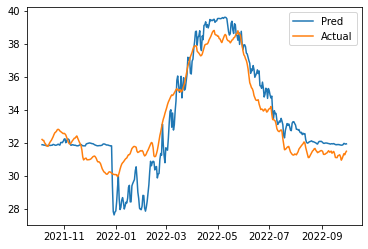

In [37]:
plt.plot(dates[-360:],pred_plot)
plt.plot(dates[-360:],test_plot)
plt.legend(["Pred","Actual"])
# plt.vlines(dates.iloc[-200],-2,2,'r')

12/12 [==============================] - 0s 9ms/step


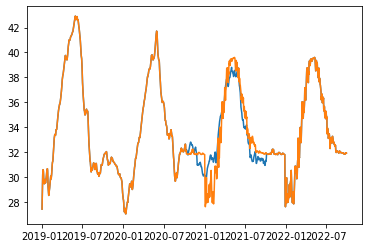

In [38]:
plt.plot(dates,np.concatenate((n1.inverse_transform(X[:,0,2].reshape(-1,1)).T[0],test_plot,n1.inverse_transform(model.predict(X[-360:])[:,0].reshape(-1,1)).T[0])))
plt.plot(dates,np.concatenate((n1.inverse_transform(X[:,0,2].reshape(-1,1)).T[0],pred_plot,n1.inverse_transform(model.predict(X[-360:])[:,0].reshape(-1,1)).T[0])))

In [39]:
model.save("./Models/Adilabad")

INFO:tensorflow:Assets written to: ./Models/Adilabad/assets


INFO:tensorflow:Assets written to: ./Models/Adilabad/assets


### Plotting with Prediction Interval: 

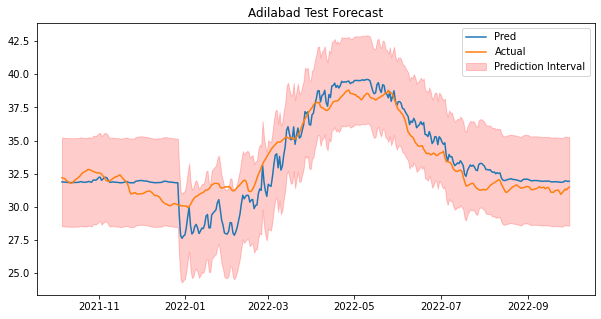

In [41]:
from scipy.stats import t

a = 0.01

n = len(pred_plot)

t_ = t.ppf(1-a/2, df=len(pred_plot)-2)

x = np.arange(len(pred_plot))
x_ = np.mean(x)

interval = t_ * np.sqrt((np.square(pred_plot-test_plot).sum()/(n-2)) * (1+(1/n)+(np.square(x-x_)/np.square(x-x_).sum())))

plt.figure(figsize=(10,5))
plt.plot(dates[-360:],pred_plot)
plt.plot(dates[-360:],test_plot)
plt.fill_between(dates[-360:],pred_plot+interval,pred_plot-interval,color='red',alpha=0.2)

plt.title("Adilabad Test Forecast")
plt.legend(["Pred","Actual","Prediction Interval"])

In [44]:
from sklearn.metrics import mean_absolute_percentage_error

print(f'Mean Absolute Percentage Error: {round(mean_absolute_percentage_error(pred_plot,test_plot)*100,3)}')

Mean Absolute Percentage Error: 3.232


## Predicting Heatwaves using Temperature Forecast

In [45]:
db_ = db[db.District=="Adilabad"].groupby("Date").mean().resample("W").mean()
db_["Date"] = db_.index

md = db_.Date.dt.strftime("%W")

db_ = db_.groupby(md, sort=False)['temp_max (⁰C)'].mean().reset_index()

/tmp/ipykernel_13768/3898014559.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  db_ = db[db.District=="Adilabad"].groupby("Date").mean().resample("W").mean()


In [46]:
ft = model.predict(X[-360:])
ft_plot = n1.inverse_transform(ft[:,0].reshape(-1,1)).T[0]

12/12 [==============================] - 0s 5ms/step


In [47]:
pred_db = pd.DataFrame()
pred_db["Date"] = pd.date_range("2022-09-30",periods=360)
pred_db["Temp"] = ft_plot
pred_db["WeekNo"] = pred_db.Date.dt.strftime("%W")
pred_db["Upper_Limit"] = pred_db["Temp"].values + interval
pred_db["Lower_Limit"] = pred_db["Temp"].values - interval
pred_db["Deviation"] = [ np.float64(i-db_[db_.Date==str(j)]["temp_max (⁰C)"].values) for i,j in pred_db.loc[:,["Upper_Limit","WeekNo"]].values]
pred_db["HeatWave"] = [2 if (pred_db.iloc[i,:]["Deviation"]>7 or pred_db.iloc[i,:]["Temp"]>=47) else (1 if (pred_db.iloc[i,:]["Deviation"]>5 or pred_db.iloc[i,:]["Temp"]>=45) else 0 ) for i in range(len(pred_db))]
pred_db[pred_db.HeatWave!=0]

/tmp/ipykernel_13768/136357867.py:8: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  pred_db["HeatWave"] = [2 if (pred_db.iloc[i,:]["Deviation"]>7 or pred_db.iloc[i,:]["Temp"]>=47) else (1 if (pred_db.iloc[i,:]["Deviation"]>5 or pred_db.iloc[i,:]["Temp"]>=45) else 0 ) for i in range(len(pred_db))]


,Date,Temp,WeekNo,Upper_Limit,Lower_Limit,Deviation,HeatWave
59,2022-11-28,31.945642,48,35.276463,28.614822,5.359929,1
60,2022-11-29,31.948914,48,35.279632,28.618195,5.363098,1
61,2022-11-30,31.914486,48,35.245103,28.583869,5.328569,1
62,2022-12-01,31.882820,48,35.213337,28.552303,5.296803,1
63,2022-12-02,31.858803,48,35.189220,28.528386,5.272686,1
64,2022-12-03,31.843388,48,35.173706,28.513069,5.257172,1
65,2022-12-04,31.821022,48,35.151243,28.490801,5.234708,1
73,2022-12-12,31.932119,50,35.261587,28.602651,6.017672,1
74,2022-12-13,31.921484,50,35.250862,28.592106,6.006946,1
75,2022-12-14,31.895725,50,35.225014,28.566437,5.981098,1


In [48]:
pred_db.to_csv("./Heatwave Predictions/Adilabad.csv")